In [171]:
import requests
import pandas as pd
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [172]:
GRT_QUERY_ENDPOINT = "https://api.thegraph.com/subgraphs/name/convex-community/curve-pools"

In [173]:
def grt_query(query):
    r = requests.post(GRT_QUERY_ENDPOINT, json={'query': query})
    return r.json()

In [174]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## General pools info

In [175]:
query = """
{
  pools(
  orderBy:creationDate
  orderDirection: asc) {
    name
    id
    lpToken
    lpTokenBalance
    gauge
    crvRewardsPool
    swap
    stash
    assetType
    apr
    tvl
    creationDate
  }
}
"""

In [176]:
data = grt_query(query)

In [177]:
df = pd.DataFrame.from_dict(data['data']['pools'])
df['creationDate'] = pd.to_datetime(df['creationDate'],unit='s')
df['tvl'] = df['tvl'].astype(float)
df['apr'] = df['apr'].astype(float)
cols = df.columns.tolist()
first_columns = ['id', 'name', 'creationDate', 'apr', 'tvl']
cols = first_columns + [_ for _ in cols if _ not in first_columns]
df = df.reindex(columns=cols)
df

,id,name,creationDate,apr,tvl,assetType,crvRewardsPool,gauge,lpToken,lpTokenBalance,stash,swap
0,42,,1970-01-01 00:00:00,0.00000,0.00000,0,0x00000000,0x00000000,0x00000000,1530744911884023335092279780,0x00000000,0x00000000
1,43,,1970-01-01 00:00:00,0.00000,0.00000,0,0x00000000,0x00000000,0x00000000,13724525316974335518720056,0x00000000,0x00000000
2,46,,1970-01-01 00:00:00,0.00000,0.00000,0,0x00000000,0x00000000,0x00000000,20262580819223399830158665,0x00000000,0x00000000
3,0,compound,2021-05-17 10:51:03,0.03459,144769487.92779,0,0xf34dff761145ff0b05e917811d488b441f33a968,0x7ca5b0a2910b33e9759dc7ddb0413949071d7575,0x845838df265dcd2c412a1dc9e959c7d08537f8a2,133227144846154300618561419,0x0000000000000000000000000000000000000000,0xa2b47e3d5c44877cca798226b7b8118f9bfb7a56
4,1,usdt,2021-05-17 10:51:36,0.04708,1398016.53476,0,0x8b55351ea358e5eda371575b031ee24f462d503e,0xbc89cd85491d81c6ad2954e6d0362ee29fca8f53,0x9fc689ccada600b6df723d9e47d84d76664a1f23,1283926354076387591925487,0x0000000000000000000000000000000000000000,0x52ea46506b9cc5ef470c5bf89f17dc28bb35d85c
5,2,y,2021-05-17 10:51:52,0.00195,16922117.76809,0,0xd802a8351a76ed5ecd89a7502ca615f2225a585d,0xfa712ee4788c042e2b7bb55e6cb8ec569c4530c1,0xdf5e0e81dff6faf3a7e52ba697820c5e32d806a8,15162370359743028633944802,0x0000000000000000000000000000000000000000,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51
6,3,busd,2021-05-17 11:00:54,0.12877,15715116.69933,0,0x602c4cd53a715d8a7cf648540fab0d3a2d546560,0x69fb7c45726cfe2badee8317005d3f94be838840,0x3b3ac5386837dc563660fb6a0937dfaa5924333b,14009411517494898150434775,0x0000000000000000000000000000000000000000,0x79a8c46dea5ada233abaffd40f3a0a2b1e5a4f27
7,4,susd,2021-05-17 11:02:43,0.11147,53295244.69530,0,0x22ee18aca7f3ee920d01f25da85840d12d98e8ca,0xa90996896660decc6e997655e065b23788857849,0xc25a3a3b969415c80451098fa907ec722572917f,51031666902504526910193448,0xd2f2b9504ef708b9f3bc53f1525353baae1b17e4,0xa5407eae9ba41422680e2e00537571bcc53efbfd
8,5,pax,2021-05-17 11:03:13,0.12253,580358.84584,0,0xe3daafc8c14147d5b4a7a56f0bfded240158e51e,0x64e3c23bfc40722d3b649844055f1d51c1ac041d,0xd905e2eaebe188fc92179b6350807d8bd91db0d8,560435286087753814421534,0x0000000000000000000000000000000000000000,0x06364f10b501e868329afbc005b3492902d6c763
9,6,ren,2021-05-17 11:03:52,0.04233,355733374.90551,2,0x8e299c62eed737a5d5a53539df37b5356a27b07d,0xb1f2cdec61db658f091671f5f199635aef202cac,0x49849c98ae39fff122806c06791fa73784fb3675,7325480394768438654035,0x0000000000000000000000000000000000000000,0x93054188d876f558f4a66b2ef1d97d16edf0895b


## Historical TVL (USD)

In [178]:
query = """
{
    dailyPoolSnapshots(
        first: 200
        where: {poolName: "link"}
        orderBy:timestamp
        orderDirection: asc) 
    {
        tvl
        timestamp
    }
}

"""

In [179]:
data = grt_query(query)

In [180]:
df = pd.DataFrame.from_dict(data['data']['dailyPoolSnapshots'])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df['tvl'] = df['tvl'].astype(float)
df

,timestamp,tvl
0,2021-05-17,7856136.12006
1,2021-05-18,17069048.17617
2,2021-05-19,3137258.17792
3,2021-05-20,4638374.36741
4,2021-05-21,4884508.97214
...,...,...
135,2021-09-30,56229017.76282
136,2021-10-01,59805170.50969
137,2021-10-02,61714619.96850
138,2021-10-03,60753913.25096


<AxesSubplot:xlabel='timestamp'>

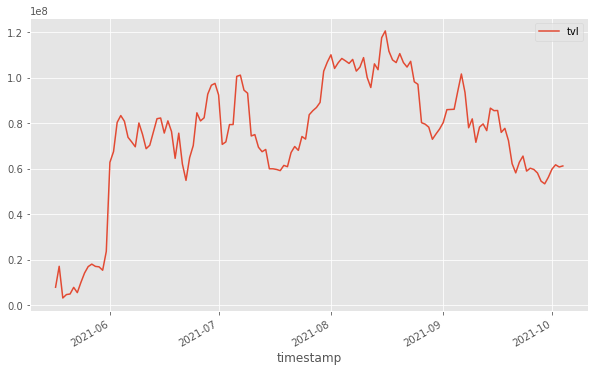

In [181]:
df.plot(x='timestamp', y='tvl', figsize=(10,6))

## Historical TVL (lpTokens)

In [182]:
query = """
{
    dailyPoolSnapshots(
        first: 200
        where: {poolName: "seth"}
        orderBy:timestamp
        orderDirection: asc) 
    {
        lpTokenBalance
        timestamp
    }
}

"""

In [183]:
data = grt_query(query)
df = pd.DataFrame.from_dict(data['data']['dailyPoolSnapshots'])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df['lpTokenBalance'] = df['lpTokenBalance'].astype(float)
df

,lpTokenBalance,timestamp
0,3036469786722049196032.00000,2021-05-17
1,9933455932390423658496.00000,2021-05-18
2,9957821553279668060160.00000,2021-05-19
3,13162607036530455216128.00000,2021-05-20
4,14144774254610851299328.00000,2021-05-21
...,...,...
135,33749662814133557395456.00000,2021-09-30
136,33665185675984758636544.00000,2021-10-01
137,33763385362250612080640.00000,2021-10-02
138,33981134018926914568192.00000,2021-10-03


<AxesSubplot:xlabel='timestamp'>

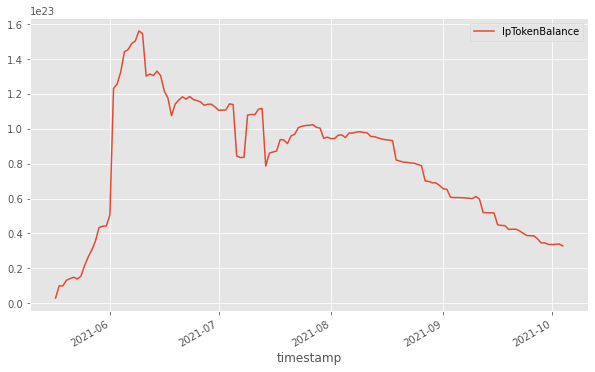

In [184]:
df.plot(x='timestamp', y='lpTokenBalance', figsize=(10,6))

## Historical APR

In [185]:
query = """
{
    dailyPoolSnapshots(
        first: 200
        where: {poolName: "seth"}
        orderBy:timestamp
        orderDirection: asc) 
    {
        apr
        timestamp
    }
}

"""

In [186]:
data = grt_query(query)

In [187]:
df = pd.DataFrame.from_dict(data['data']['dailyPoolSnapshots'])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df['apr'] = df['apr'].astype(float) * 100
df['apr'] = df['apr'].apply(lambda x: 0 if x > 300 else x) # bug w/ several pool. apr calculus issue ?
df

,apr,timestamp
0,0.00000,2021-05-17
1,2.03276,2021-05-18
2,1.74604,2021-05-19
3,5.92339,2021-05-20
4,6.87100,2021-05-21
...,...,...
135,3.63132,2021-09-30
136,3.62362,2021-10-01
137,2.21046,2021-10-02
138,2.35188,2021-10-03


<AxesSubplot:xlabel='timestamp'>

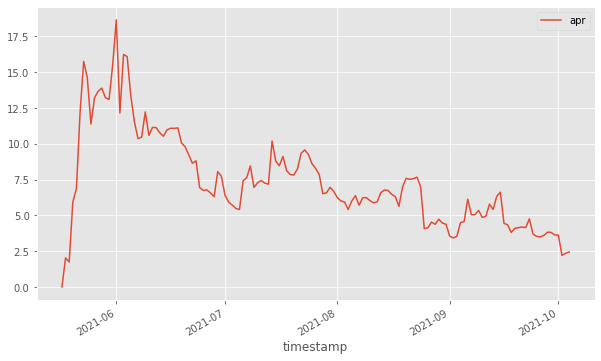

In [188]:
df.plot(x='timestamp', y='apr', figsize=(10,6))

## Deposits vs Withdrawals

In [189]:
query = """
{
    dailyPoolSnapshots(
        where: {poolid: 3}
        orderBy:timestamp
        orderDirection: asc) 
    {
        withdrawalValue
        depositValue
        timestamp
    }
}

"""

In [190]:
data = grt_query(query)

In [191]:
df = pd.DataFrame.from_dict(data['data']['dailyPoolSnapshots'])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s').dt.strftime('%Y-%m-%d')
df['depositValue'] = df['depositValue'].astype(float)
df['withdrawalValue'] = df['withdrawalValue'].astype(float)
df

,depositValue,timestamp,withdrawalValue
0,3984756006245187977216.00000,2021-06-03,0.00000
1,7631700280808834382954496.00000,2021-06-04,0.00000
2,10859046777995336351744.00000,2021-06-05,0.00000
3,9005658326365718446080.00000,2021-06-06,32367171887451489697792.00000
4,18051267592578305884160.00000,2021-06-07,0.00000
...,...,...,...
95,3714442025196815646720.00000,2021-09-26,0.00000
96,5899192542993928159232.00000,2021-09-27,208298470049681952997376.00000
97,0.00000,2021-09-28,10017192692215076356096.00000
98,0.00000,2021-09-29,2489313244331646233083904.00000


(1, 1.975898189867507e+26)

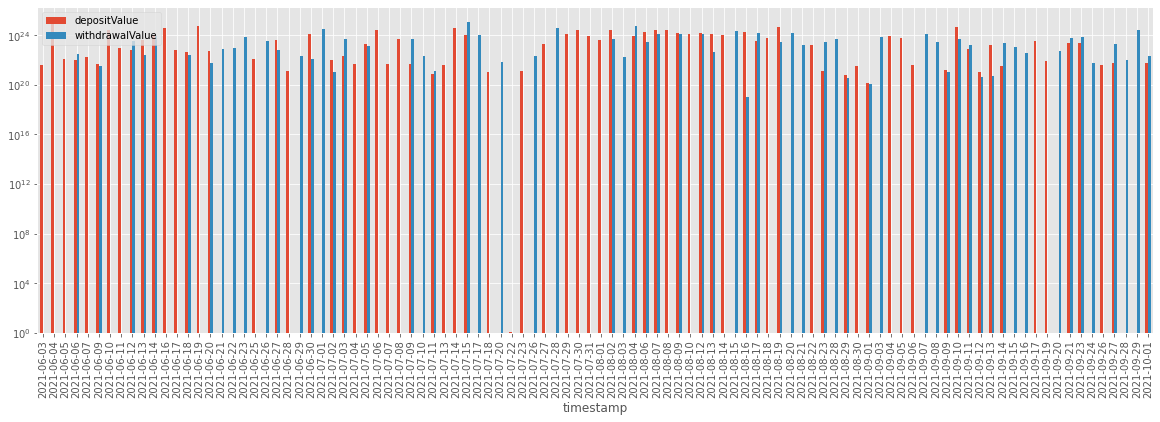

In [192]:
ax = df.plot.bar(x='timestamp', figsize=(20,6), logy=True)
ax.set_ylim(ymin=1)